<a href="https://colab.research.google.com/github/AOngomefen/DATA-110-21843/blob/main/Project1_assignment_fall25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
> This dataset tracks global CO₂ emissions over 14 years across multiple countries, organized into four columns: country, country code, year, and CO₂ emissions. I chose it because of my prior work exploring the relationship between environmental protection and global emissions. Analyzing individual countries helps identify patterns and potential solutions, which can be visualized by ranking or clustering nations based on their emission levels.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('co2_global_emissions_lab_clean.csv')
df.head()

,Country Name,Country Code,year,co2
0,Aruba,ABW,2000.0,26.194875
1,Aruba,ABW,2001.0,25.934024
2,Aruba,ABW,2002.0,25.671162
3,Aruba,ABW,2003.0,26.420452
4,Aruba,ABW,2004.0,26.517293


In [19]:
df.shape

(3732, 4)

In [20]:
df.columns

Index(['Country Name', 'Country Code', 'year', 'co2'], dtype='object')

In [21]:
df.tail()

,Country Name,Country Code,year,co2
3727,Zimbabwe,ZWE,2010.0,0.552146
3728,Zimbabwe,ZWE,2011.0,0.664751
3729,Zimbabwe,ZWE,2012.0,0.529703
3730,Zimbabwe,ZWE,2013.0,0.775564
3731,Zimbabwe,ZWE,2014.0,0.779956


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3732 non-null   object 
 1   Country Code  3732 non-null   object 
 2   year          3720 non-null   float64
 3   co2           3720 non-null   float64
dtypes: float64(2), object(2)
memory usage: 116.8+ KB


In [45]:

df.describe()

,year,co2
count,3720.000000,3720.000000
mean,2007.032796,4.797763
std,4.319456,6.199335
min,2000.000000,0.017276
25%,2003.000000,0.814719
50%,2007.000000,2.861296
75%,2011.000000,6.764461
max,2014.000000,67.106018


Summary of EDA
> My exploratory data analysis (EDA) began by assessing the dataset’s structure and scope, which included 3,731 records detailing CO₂ emissions by country. The data spans approximately 14 years for most nations, with entries organized alphabetically from Aruba to Zimbabwe. Initial inspections focused on understanding the temporal coverage and completeness of the dataset. Subsequent analyses examined global emission trends over time and identified both the highest and lowest emitting countries to uncover potential patterns. The primary objectives were to identify the countries with the highest average CO₂ emissions, analyze temporal changes in global emissions, and evaluate regional disparities in emission levels.



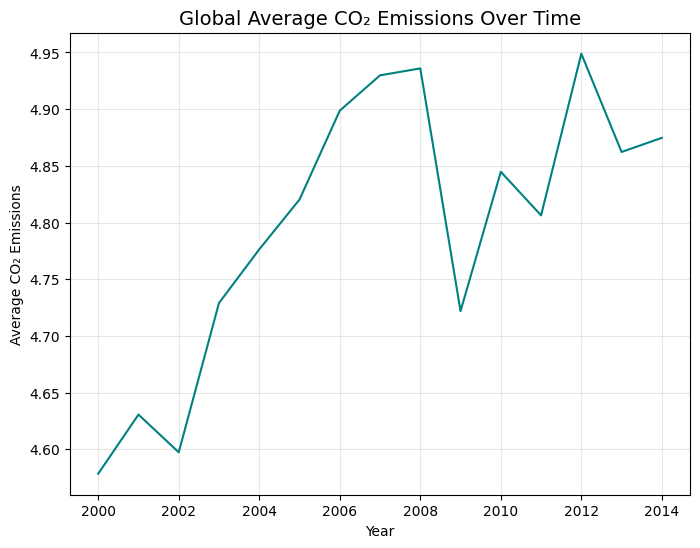

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='year', y='co2', estimator='mean', errorbar=None, color='teal')
plt.title("Global Average CO₂ Emissions Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average CO₂ Emissions")
plt.grid(True, alpha=0.3)
plt.show()

Global CO₂ Emissions Over Time
> A line plot was used to visualize global CO₂ emission trends from 2000 to 2014. This visualization type was chosen because it effectively captures temporal changes and highlights fluctuations across consecutive years. The line graph revealed an overall upward trend in global CO₂ emissions, indicating steady growth over the 14-year period. However, several notable deviations were observed — dips in 2002, 2009, 2011, and 2013 — suggesting possible economic or policy-driven impacts during those years. Emissions peaked in 2012, marking the highest recorded output within the dataset. This visualization provides valuable insights into both the long-term progression of global emissions and the short-term anomalies that may warrant further investigation.

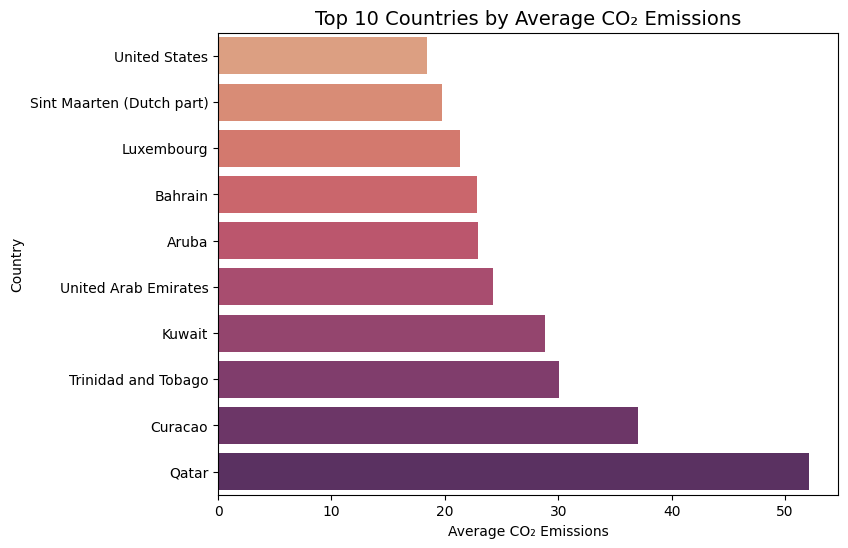

In [32]:
top10 = df.groupby('Country Name')['co2'].mean().nlargest(10).sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=top10.values, y=top10.index, hue=top10.index, palette="flare", legend=False)
plt.title("Top 10 Countries by Average CO₂ Emissions", fontsize=14)
plt.xlabel("Average CO₂ Emissions")
plt.ylabel("Country")
plt.show()


Top 10 Countries by Average CO₂ Emissions
> This bar plot was chosen to compare the top 10 countries with the highest average CO₂ emissions. This visualization type was selected because bar plots effectively display categorical comparisons, making it easy to rank and contrast emission levels between countries. The analysis revealed that Qatar is the highest contributor, averaging approximately 50 (units) — more than twice the emissions of the 10th-ranked country, the United States. This visualization highlights significant disparities in emission levels across nations, emphasizing the disproportionate impact of a few high-emitting countries on global CO₂ output.

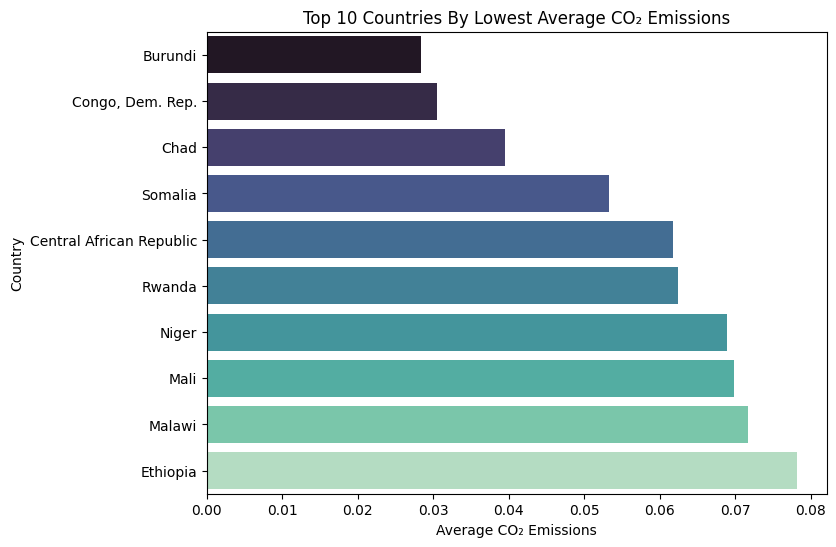

In [35]:
bottom10 = df.groupby('Country Name')['co2'].mean().nsmallest(10).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=bottom10.values, y=bottom10.index, hue=bottom10.index, palette="mako", legend=False)
plt.title("Top 10 Countries By Lowest Average CO₂ Emissions", fontsize=12)
plt.xlabel("Average CO₂ Emissions")
plt.ylabel("Country")
plt.show()


Bottom 10 Countries by Average CO₂ Emissions
> The same was used to visualize the 10 countries with the lowest average CO₂ emissions. This visualization allows for straightforward comparison among nations with minimal emission levels. The results showed that Burundi had the lowest average CO₂ emissions—less than half of those recorded by the 10th country, Ethiopia. Notably, most of the countries in this group are located in Northern Africa, which may reflect broader patterns related to economic development, industrial activity, and energy consumption. This visualization highlights how economic stability and resource availability can influence national emission outputs.



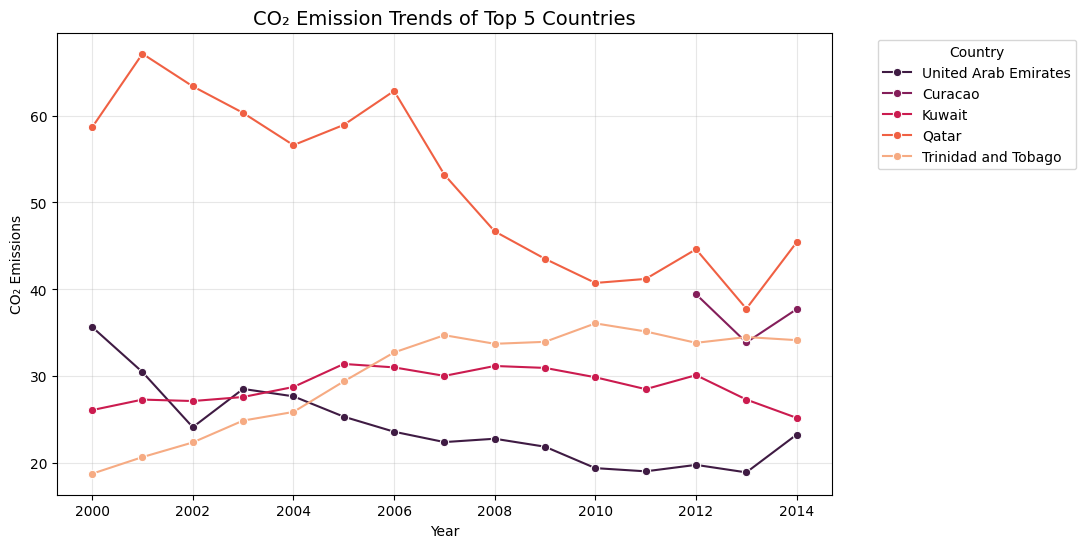

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('co2_global_emissions_lab_clean.csv')

top_countries = df.groupby('Country Name')['co2'].mean().nlargest(5).index

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country Name'].isin(top_countries)],
             x='year', y='co2', hue='Country Name', marker='o', palette='rocket')
plt.title("CO₂ Emission Trends of Top 5 Countries", fontsize=14)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


Top 5 Average CO₂ Emitters
> A comparative line plot was used to visualize the average CO₂ emissions of the top five emitting countries over time. This visualization type was chosen because it effectively highlights both individual country trends and disparities between them. The analysis revealed a pronounced gap between Qatar and the other top emitters, underscoring its disproportionately high contribution to global emissions. The noticeable decline in the global average around 2009 may be partially explained by a steady reduction in Qatar’s emissions between 2006 and 2010. This visualization provides insight into how shifts within a single high-emitting nation can influence global emission trends.

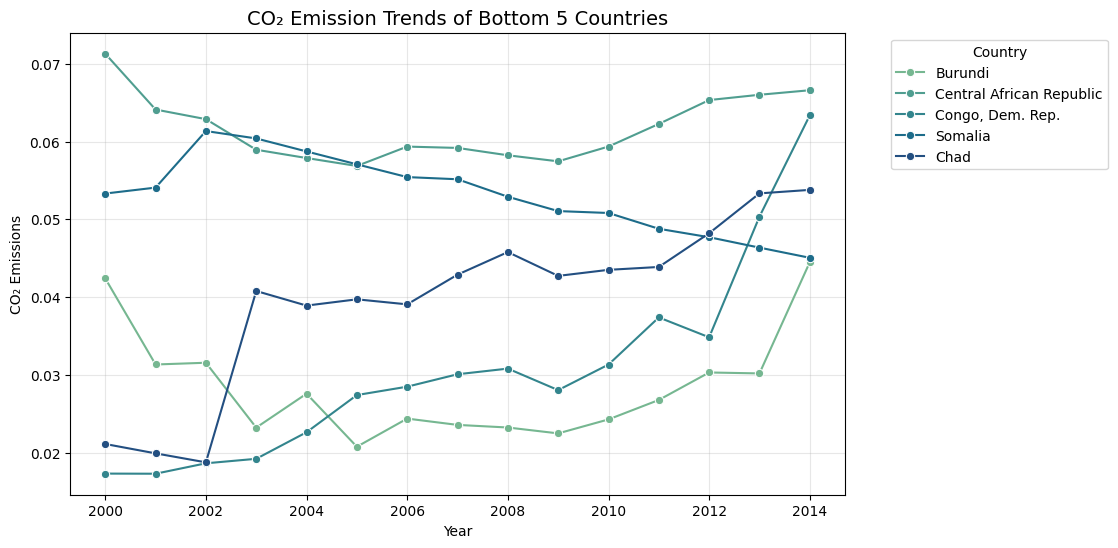

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('co2_global_emissions_lab_clean.csv')

top_countries = df.groupby('Country Name')['co2'].mean().nsmallest(5).index

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country Name'].isin(top_countries)],
             x='year', y='co2', hue='Country Name', marker='o', palette='crest')
plt.title("CO₂ Emission Trends of Bottom 5 Countries", fontsize=14)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Bottom 5 Average CO₂ Emitters
> A comparative line plot was used to display the CO₂ emission trends of the five countries with the lowest average emissions. This visualization was chosen because it clearly illustrates subtle variations and consistency in emission patterns over time. The analysis showed that these countries maintained relatively stable and minimal emission levels throughout the observed period, with only slight fluctuations. This consistency suggests limited industrialization and slower economic growth compared to higher-emitting nations. The visualization highlights the contrast between low-emission stability and the volatility seen in top-emitting countries, offering a more comprehensive understanding of global emission disparities.


Conclusion

Between 2000 and 2014, the analysis revealed that a small group of countries—primarily Qatar, Curaçao, Trinidad and Tobago, Kuwait, the United Arab Emirates, Aruba, Bahrain, Luxembourg, Sint Maarten, and the United States—had the most significant impact on global average CO₂ emissions. These nations’ high emission levels are closely linked to wealth concentration, rapid industrialization, and large-scale infrastructure or energy projects.
In contrast, countries such as Burundi, the Republic of the Congo, and Chad exhibited minimal CO₂ contributions, reflecting limited industrial activity and slower economic development. The stark disparity between high- and low-emitting nations underscores the influence of economic capacity on environmental impact.
Future research could explore the relationship between economic growth, energy policy, and emission intensity, particularly focusing on how sustainable development strategies might reduce emissions without hindering economic progress.